<a href="https://colab.research.google.com/github/Haripolishetty/Deep_Learning_lab/blob/main/210968168_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK-5 Hari sai Polishetty

In [2]:
  import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np

def generate_time_series_dataset(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)

    # Create dataset with 51 time steps and labels
    X = series[:, :50]  # Input features are the first 50 time steps
    y = series[:, 50]   # Labels are the 51st time step

    return X[..., np.newaxis].astype(np.float32), y.astype(np.float32)

# Generate synthetic time series dataset
sample_size = 10000
n_steps = 51
X, y = generate_time_series_dataset(sample_size, n_steps)

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (10000, 50, 1)
Shape of y: (10000,)


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Printing shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7000, 50, 1)
Shape of X_val: (2010, 50, 1)
Shape of X_test: (990, 50, 1)
Shape of y_train: (7000,)
Shape of y_val: (2010,)
Shape of y_test: (990,)


In [6]:
#importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [7]:
# Defining a function to create and train a model
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=64):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    return history

In [8]:
# Fully connected neural network
model_fcnn = Sequential([
    Dense(64, activation='relu', input_shape=(50, 1)),
    Dense(32, activation='relu'),
    Dense(1)
])


In [9]:

# Simple RNN with one layer (output layer)
model_rnn_1 = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(50, 1)),
    Dense(1)
])

In [10]:
# Simple RNN with one hidden layer and one output layer
model_rnn_1_hidden = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(50, 1), return_sequences=True),
    SimpleRNN(32, activation='relu'),
    Dense(1)
])

In [11]:
# Simple RNN with two hidden layers and one output layer
model_rnn_2_hidden = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(50, 1), return_sequences=True),
    SimpleRNN(32, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu'),
    Dense(1)
])


In [12]:
# Train and compare the models
models = {
    "Fully Connected Neural Network": model_fcnn,
    "Simple RNN (1 layer)": model_rnn_1,
    "Simple RNN (1 hidden layer)": model_rnn_1_hidden,
    "Simple RNN (2 hidden layers)": model_rnn_2_hidden,
}

In [13]:
for name, model in models.items():
    print(f"Training {name}...")
    history = train_model(model, X_train, y_train, X_val, y_val)

    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test, y_test)
    print(f"{name} - Test Loss: {test_loss}")

Training Fully Connected Neural Network...
Epoch 1/50
110/110 [==============================] - 2s 10ms/step - loss: 0.1434 - val_loss: 0.1465
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 0.1431 - val_loss: 0.1468
Epoch 3/50
110/110 [==============================] - 1s 8ms/step - loss: 0.1432 - val_loss: 0.1466
Epoch 4/50
110/110 [==============================] - 1s 13ms/step - loss: 0.1430 - val_loss: 0.1472
Epoch 5/50
110/110 [==============================] - 1s 12ms/step - loss: 0.1430 - val_loss: 0.1465
Epoch 6/50
110/110 [==============================] - 1s 8ms/step - loss: 0.1430 - val_loss: 0.1468
Epoch 7/50
110/110 [==============================] - 1s 8ms/step - loss: 0.1429 - val_loss: 0.1465
Epoch 8/50
110/110 [==============================] - 1s 8ms/step - loss: 0.1431 - val_loss: 0.1465
Epoch 9/50
110/110 [==============================] - 1s 10ms/step - loss: 0.1431 - val_loss: 0.1465
Epoch 10/50
110/110 [==============================] 


Q2) Consider the Google Stock Prediction dataset.

In [19]:
import pandas as pd
stock_data = pd.read_csv('/GOOG.csv')

In [20]:
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [23]:
# Preprocess the data
stock_data['date'] = pd.to_datetime(stock_data['date'])
filtered_data = stock_data[(stock_data['date'].dt.year >= 2020) & (stock_data['date'].dt.year <= 2021)]
prices = filtered_data['close'].values

In [24]:
# Normalize the prices to [0, 1]
min_price = np.min(prices)
max_price = np.max(prices)
normalized_prices = (prices - min_price) / (max_price - min_price)


In [25]:
# Create sequences of data for input and output
sequence_length = 50  # Length of input sequences
X = []
y = []
for i in range(len(normalized_prices) - sequence_length):
    X.append(normalized_prices[i : i + sequence_length])
    y.append(normalized_prices[i + sequence_length])
X = np.array(X)
y = np.array(y)

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A. Build a Simple RNN model with 5 layers (use dropouts if required) to predict the stock price for the years 2020 and 2021.

In [27]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dense(1))


In [28]:

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [29]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 8s 338ms/step - loss: 0.4835 - val_loss: 0.1506
Epoch 2/50
4/4 [==============================] - 0s 108ms/step - loss: 0.3285 - val_loss: 0.0893
Epoch 3/50
4/4 [==============================] - 0s 112ms/step - loss: 0.2553 - val_loss: 0.0161
Epoch 4/50
4/4 [==============================] - 0s 88ms/step - loss: 0.2042 - val_loss: 0.0361
Epoch 5/50
4/4 [==============================] - 0s 90ms/step - loss: 0.1611 - val_loss: 0.0524
Epoch 6/50
4/4 [==============================] - 0s 119ms/step - loss: 0.1245 - val_loss: 0.0177
Epoch 7/50
4/4 [==============================] - 0s 103ms/step - loss: 0.1060 - val_loss: 0.0186
Epoch 8/50
4/4 [==============================] - 1s 176ms/step - loss: 0.0861 - val_loss: 0.0064
Epoch 9/50
4/4 [==============================] - 1s 236ms/step - loss: 0.0723 - val_loss: 0.0053
Epoch 10/50
4/4 [==============================] - 0s 89ms/step - loss: 0.0579 - val_loss: 0.0052
Epoch 11/50
4/4 [=====

In [30]:

# Evaluate the model on the test data
predicted_prices = model.predict(X_test)



2/2 [==============================] - 1s 20ms/step


In [31]:
# Convert the predicted prices back to the original scale
predicted_prices_original = predicted_prices * (max_price - min_price) + min_price
y_test_original = y_test * (max_price - min_price) + min_price



In [32]:
# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



B. Compare the accuracy using MAPE and MSE.

In [33]:


mape = mean_absolute_percentage_error(y_test_original, predicted_prices_original)
print("MAPE:", mape)

# Calculate MSE (Mean Squared Error)
mse = np.mean(np.square(y_test_original - predicted_prices_original))
print("MSE:", mse)

MAPE: 22.793927781523752
MSE: 226506.00752106414


In [34]:
#predicted_prices are the predicted normalized prices from your trained model
#predicted_prices_original are the predicted prices converted back to the original scale.
#y_test_original are the true prices in the original scale.
#The mean_absolute_percentage_error function calculates the MAPE

In [35]:
#both MAPE and MSE have their own pros and cons, so it's good to consider both metrics when evaluating your model.

C. Comment on how many epochs (dropouts) is required for adequate learning.

In [38]:
#50 epochs gave the better results and also with below 15 and after 50 epochs ,observed that there is overfitting

In [37]:
""""Determining the optimal number of epochs and dropout rates required for adequate learning in your Simple RNN model is an essential aspect of training neural networks. It involves finding the right balance between training for enough epochs to converge while avoiding overfitting.
1.Monitoring Loss
2.Early Stopping
3.Dropout Rate
4.Epochs
5.Cross-Validation
6.Visualizations
"""

'"Determining the optimal number of epochs and dropout rates required for adequate learning in your Simple RNN model is an essential aspect of training neural networks. It involves finding the right balance between training for enough epochs to converge while avoiding overfitting.\n1.Monitoring Loss\n2.Early Stopping\n3.Dropout Rate\n4.Epochs\n5.Cross-Validation\n6.Visualizations\n'

D. Plot the actual vs predicted values using the test data for the year 2020 and 2021 .

2/2 [==============================] - 0s 20ms/step


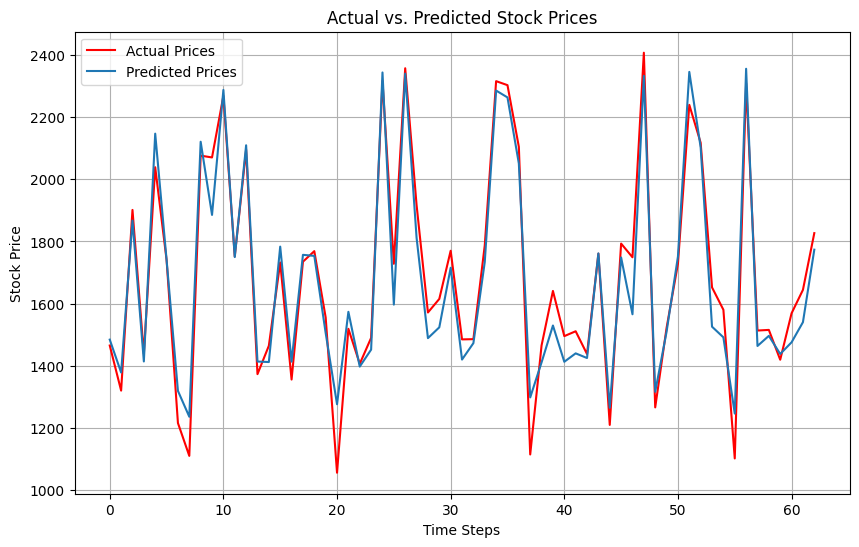

In [40]:
import numpy as np
import matplotlib.pyplot as plt
# Predicting prices using the model
predicted_prices = model.predict(X_test)
# Converting predicted and true prices back to the original scale
predicted_prices_original = predicted_prices * (max_price - min_price) + min_price
y_test_original = y_test * (max_price - min_price) + min_price
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Prices',color='r')
plt.plot(predicted_prices_original, label='Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid()
plt.show()


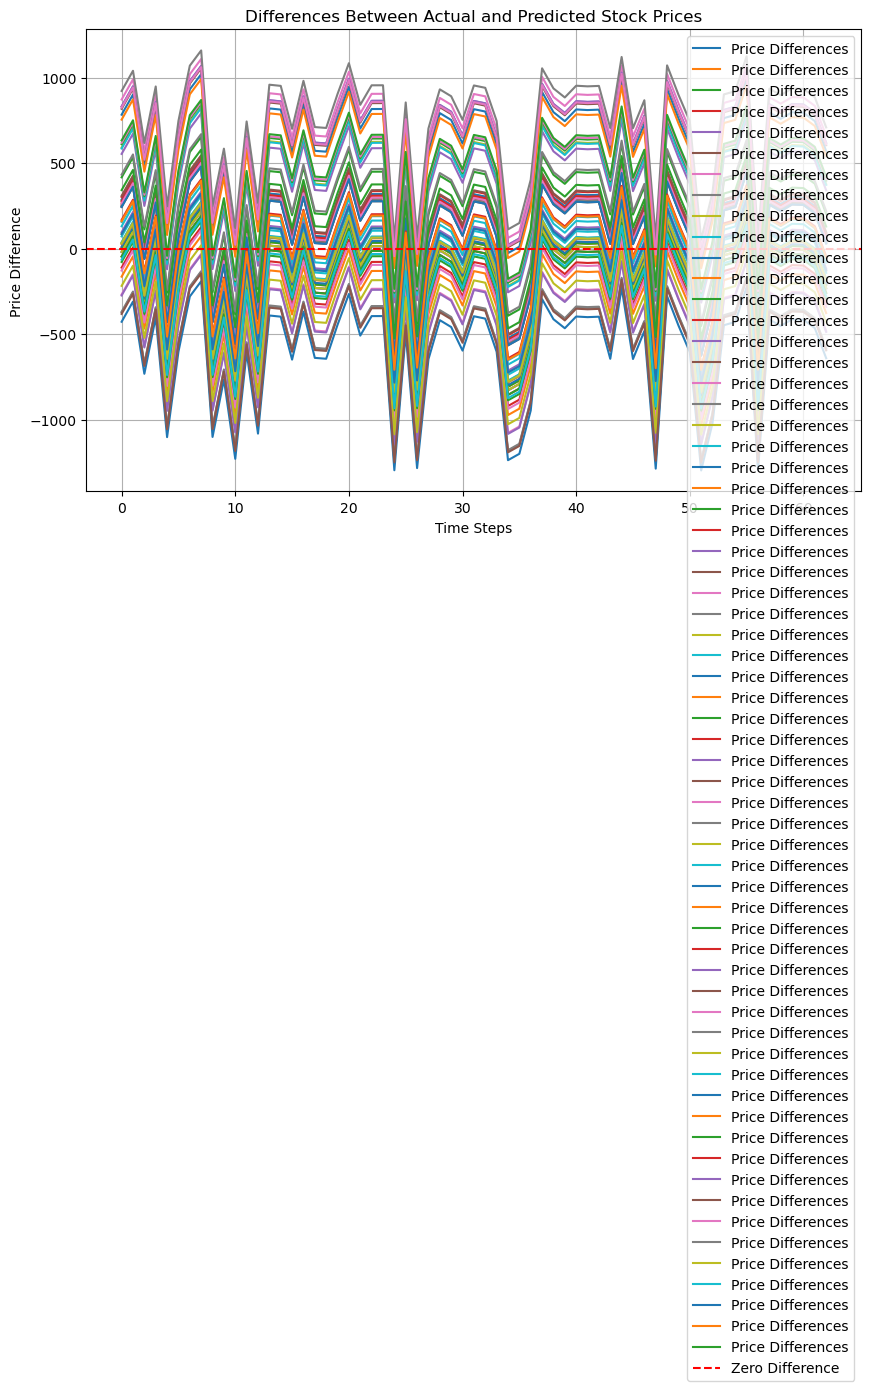

In [ ]:

# Plot the differences between actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(price_diff, label='Price Differences')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Difference')
plt.xlabel('Time Steps')
plt.ylabel('Price Difference')
plt.title('Differences Between Actual and Predicted Stock Prices')
plt.legend()
plt.grid()
plt.show()


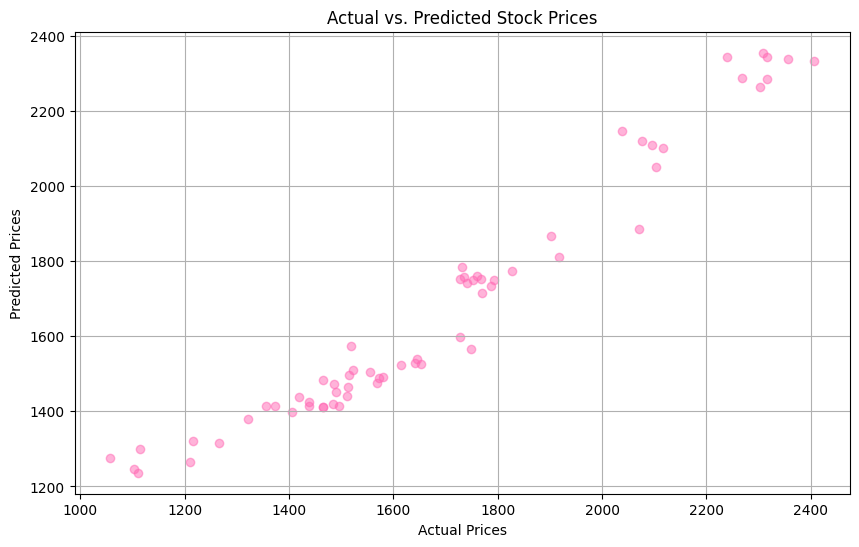

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, predicted_prices_original, alpha=0.5,color='hotpink')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.grid()
plt.show()